<a href="https://colab.research.google.com/github/Fonseca-BrunoC/Processo-batelada---Monod/blob/main/Monod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Processo batelada a partir da equação de Monod***


In [196]:
#Importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from IPython.display import Image

In [197]:
img1 = Image(filename='eq_mi_monod.PNG')
img2 = Image(filename='eq_cel_monod.PNG')
img3 = Image(filename='eq_subst_monod.PNG')

## Por Monod, mi não é mais constante e depende do substrato

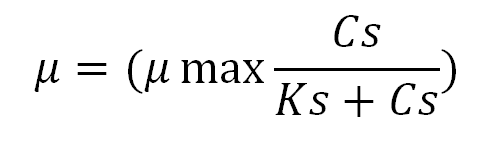

In [198]:
img1

## Com isso, a equação para a variação celular assume uma nova forma

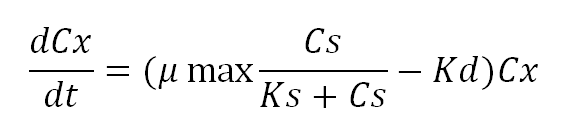

In [200]:
img2

## Como a variação celular agora depende do substrato, é necessário também equacionar a variação do substrato no sistema

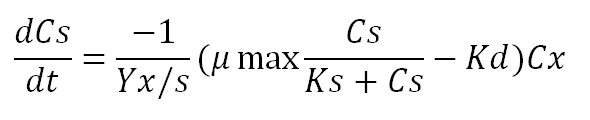

In [201]:
img3

In [199]:
#Definindo as condições
mimax = 0.5 #unidade 1/hora - taxa específica de crescimento
Ks = 1.5 #constante de semi-saturação
Cx0 = 1.0 #  concentração inicial de microrganismo
Cs0 = 50.0 #concentração inicial de substrato
Yxs = 0.5 #coeficiente estequiométrico
kd = 0.05 #constante de morte celular

In [202]:
#Definindo a EDO
def edo(C, t):  
  Cx, Cs = C
  mi = mimax * (Cs / (Ks + Cs)) #Monod
  dCxdt = (mi - kd) * Cx #eq para célula
  dCsdt = - (1/Yxs) * (mi - kd) * Cx #eq para o substrato
  return dCxdt, dCsdt

In [203]:
#Definindo a solução da edo
t = np.linspace(0, 15, 200) #vetor tempo em horas
ConcentI = Cx0, Cs0
sol = odeint(edo, ConcentI, t)

In [204]:
Cx = sol[:,0]
##Vetor com a concentração de substrato
Cs = sol[:,1]

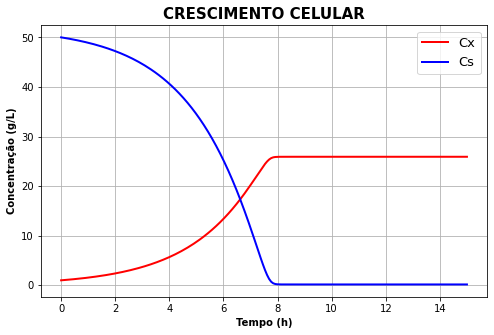

In [205]:
#Plotando o gráfico da solução
f = plt.figure()     
ax = f.add_subplot(111)  
plt.rc('axes', titlesize=15)     
plt.rc('axes', labelsize=10)   
func1 = ax.plot(t, Cx, 'r-', linewidth = 2, label = 'Cx')
func2 = ax.plot(t, Cs, 'b-', linewidth = 2, label = 'Cs')
ax.set_title("CRESCIMENTO CELULAR", weight ='bold')  
ax.set_xlabel('Tempo (h)',weight='bold')               
ax.set_ylabel('Concentração (g/L)', weight='bold')
ax.grid(True)  
plt.rc('legend', fontsize=13) 
ax.legend()
f.set_figheight(5)                                                 
f.set_figwidth(8)          
plt.show()